In [1]:
import cv2

from os import listdir

from color_classifier import *

from image_helpers import *

import pytesseract as tess


coords = {
    'stats_table' : (195, 490, 831, 970),
    'Name' : (1550, 1870, 175, 205),
}


categories = ['Accuracy','Damage','Range','Fire Rate','Mobility','Control']

csv_header = ['Class', 'Weapon','Category','Attachment','Accuracy','Damage','Range','Fire Rate','Mobility','Control']


rows = []
classes = listdir('data/Guns/')
if '.DS_Store' in classes:
    classes.remove(".DS_Store")
for wep_class in classes:
    guns = listdir('data/Guns/{}'.format(wep_class))
    if '.DS_Store' in guns:
        guns.remove(".DS_Store")
    for gun in guns:
        categories = listdir('data/Guns/{}/{}'.format(wep_class, gun))
        if '.DS_Store' in categories:
            categories.remove(".DS_Store")
        for category in categories:
            attachments = listdir('data/Guns/{}/{}/{}'.format(wep_class, gun, category))
            if '.DS_Store' in attachments:
                attachments.remove('.DS_Store')
            for attachment in attachments:
                path = 'data/Guns/{}/{}/{}/{}'.format(wep_class, gun, category, attachment)
                img = cv2.imread(path, 0)
                
                x0,x1,y0,y1 = coords['stats_table']
                stats_window = img[y0:y1,x0:x1]
                
                x0,x1,y0,y1 = coords['Name']
                attachment_window = img[y0:y1,x0:x1]
                att_name = tess.image_to_string(attachment_window)
                
                stat_lines = []    
                slice_size = round(stats_window.shape[0]/6)
                for i in range(0,6):
                    start = i * slice_size
                    end = start + slice_size
                    stat = stats_window[start:end,:]
                    stat_lines.append(stat)
                
                attachment_stats = []
                for i,each in enumerate(stat_lines):
                    mid = round(each.shape[0]/2)
                    arr = each[mid,:]
                    attachment_stats.append(color_classifier(arr,category))
                
                row = [wep_class, gun, category, att_name] + attachment_stats
                rows.append(row)
                
with open("attachment_data2.csv","w") as file:
    writer = csv.writer(file)
    writer.writerow(csv_header)
    for row in rows:
        writer.writerow(row)

In [131]:
rows

[['Rifles',
  'Aug',
  'Barrel',
  '407mm Lightweight',
  0.7,
  0.0,
  3.87,
  0.0,
  -2.11,
  0.0],
 ['Rifles',
  'Aug',
  'Barrel',
  '622mm Long Barrel',
  3.87,
  0.0,
  7.04,
  0.0,
  -5.99,
  4.93],
 ['Rifles',
  'Aug',
  'Barrel',
  '407mm Extended Barrel',
  1.76,
  0.0,
  3.87,
  0.0,
  -1.41,
  1.76],
 ['Rifles',
  'Aug',
  'Underbarrel',
  'Commando Foregrip',
  3.87,
  0.0,
  1.76,
  0.0,
  -2.11,
  2.82],
 ['Rifles', 'Aug', 'Laser', 'SmW Laser', 3.87, 0.0, 0.0, 0.0, 2.11, -1.06],
 ['Rifles', 'Aug', 'Muzzle', 'Compensator', 1.76, 0.0, 0.0, 0.0, -1.06, 2.82],
 ['Rifles',
  'Aug',
  'Stock',
  'FTAC Ultralight Hollow',
  -1.06,
  0.0,
  0.0,
  0.0,
  3.87,
  -2.46],
 ['Rifles',
  'Aug',
  'Ammunition',
  '5.56 NATO 60-Round Drums',
  -2.11,
  8.1,
  9.86,
  -3.87,
  -4.93,
  -4.93],
 ['Rifles',
  'Aug',
  'Grip',
  'Granulated Grip Tape',
  1.76,
  0.0,
  0.0,
  0.0,
  -2.11,
  1.76],
 ['Rifles', 'Aug', 'Base', '', 65.14, 53.87, 58.1, 75.0, 63.03, 70.07]]

407mm Extended Barrel
ede mEL


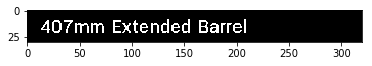

In [125]:
import pytesseract as tess

path = 'data/Guns/Rifles/Aug/Barrel/screenshot2.png'
img = cv2.imread(path, 0)
cropped = halfsize(img)

x0, x1, y0, y1 = (1550, 1870, 175, 205)
attachment_window = img[y0:y1,x0:x1]
ret, thresh = cv2.threshold(attachment_window, 127, 255, cv2.THRESH_BINARY_INV)
print(tess.image_to_string(attachment_window))
plt.imshow(thresh,'gray')
print(tess.image_to_string(thresh))
# plt.imshow(attachment_window,'gray')